In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
missing_values = df.isnull().sum()
print(missing_values)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition']]
y = df['price']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Example: Predict the price for a new house
new_house_features = np.array([2000, 3, 2, 2, 8, 3]).reshape(1, -1)
new_house_features = scaler.transform(new_house_features)  # Scale the new house features
predicted_price = model.predict(new_house_features)
print(f'Predicted Price for New House: ${predicted_price[0]:,.2f}')

Predicted Price for New House: $481,562.50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 69796723760.41316
R-squared (R2) Score: 0.5388532878688126


In [8]:
# To predict the price of a new house, you can use the trained model as follows.
new_house_features = np.array([2000, 3, 2, 2, 8, 3]).reshape(1, -1)
new_house_features = scaler.transform(new_house_features)  # Scale the new house features
predicted_price = model.predict(new_house_features)
print(f'Predicted Price for New House: ${predicted_price[0]:,.2f}')

Predicted Price for New House: $481,562.50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


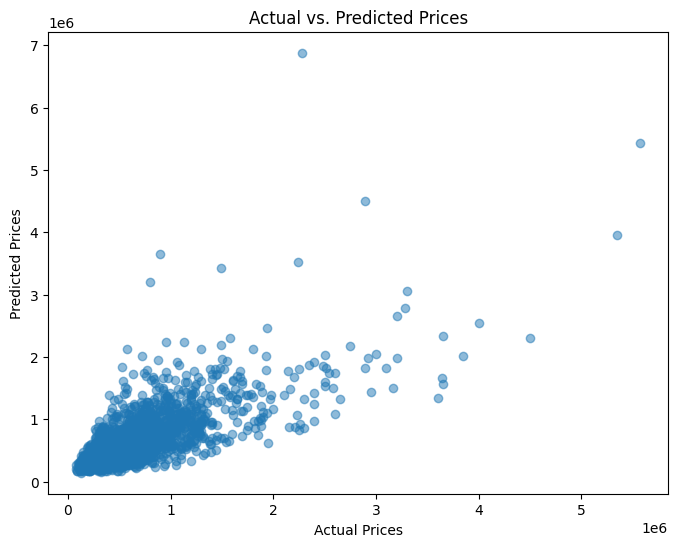

In [9]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

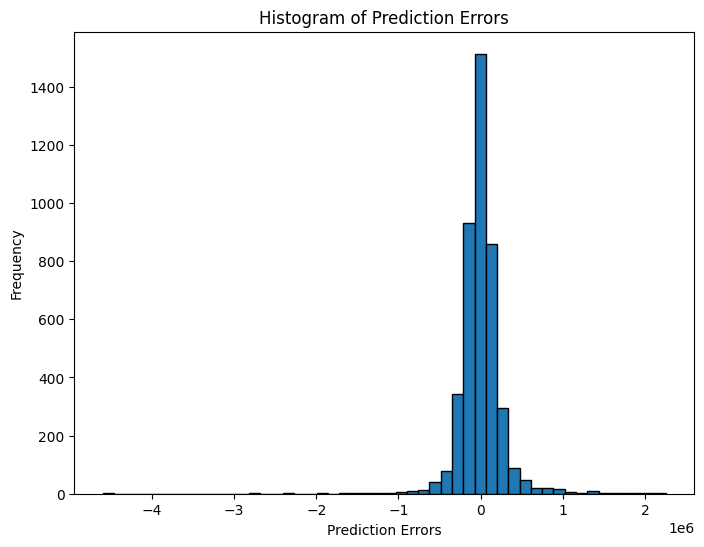

In [10]:
# Calculate prediction errors
errors = y_test - y_pred
# Create a histogram of prediction errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='k')
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.show()

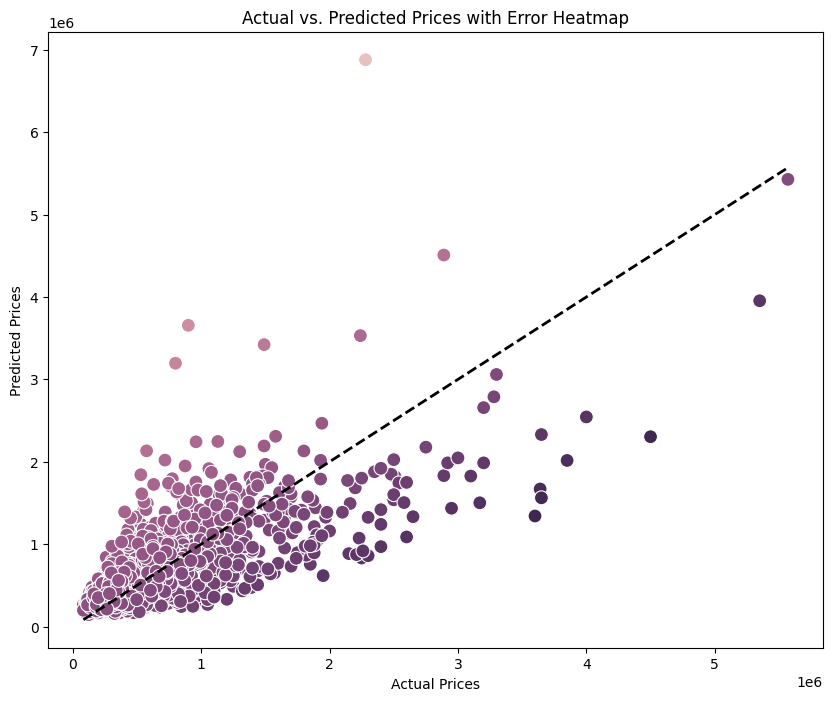

In [11]:
# Calculate prediction errors
errors = y_test - y_pred
# Create a scatter plot with colors
plt.figure(figsize=(10, 8))
cmap = sns.cubehelix_palette(dark=0.2, light=0.8, as_cmap=True)
sns.scatterplot(x=y_test, y=y_pred, hue=errors, palette=cmap, edgecolor='w', s=100)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices with Error Heatmap")
plt.legend([],[], frameon=False)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()